In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
T=2000 # timesteps
x=range(1,T+1)

In [37]:
def get_linear():    
    beta_1 = 1.0e-4
    beta_T = 0.02
    
    def get_beta_fn(t):
        # give t ~[1, T]
        # return beta_t
        k = (beta_T - beta_1)/ T # Slope get k
        b = beta_1 - k * 1 # substitute into point (1, 1e-4) get intercept b
        return k*t + b

    beta_t = [ get_beta_fn(t) for t in x]
    alpha_t = [ 1.0 - b_t for b_t in beta_t ]
    alpha_cumprod = np.cumprod(alpha_t)
    sqrt_one_minus_alphas_cumprod = [np.sqrt(1.0 - a_c_t) for a_c_t in alpha_cumprod]
    
    return sqrt_one_minus_alphas_cumprod

In [38]:
def get_cosine():  
    s=0.08
    
    def cos_fn(t):
        # give a t, return f(t)
        return np.cos(np.pi * 0.5 * ( (t/T + s) / (1.0 + s))) ** 2
    
    alpha_cumprod = [ cos_fn(t)/cos_fn(0)  for t in x]
    sqrt_one_minus_alphas_cumprod = [np.sqrt(1.0 - a_c_t) for a_c_t in alpha_cumprod]
    
    return sqrt_one_minus_alphas_cumprod

In [39]:
def get_sqrt():
    s=1.0e-4
    
    alpha_cumprod = [1.0 - np.sqrt(s + t/T) for t in range(1,T+1)]
    sqrt_one_minus_alphas_cumprod = [np.sqrt(1.0 - a_c_t) for a_c_t in alpha_cumprod]

    return sqrt_one_minus_alphas_cumprod

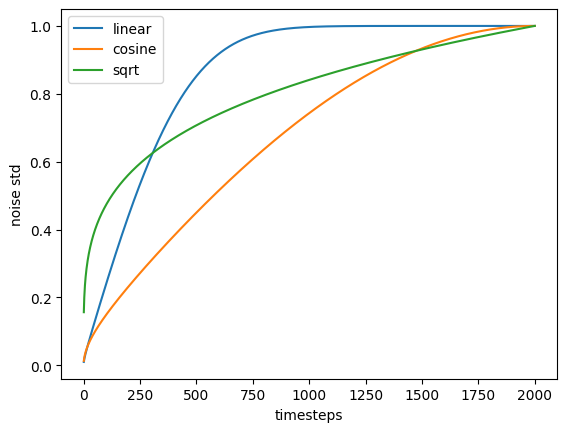

In [40]:
result_linear = get_linear()
result_cosine = get_cosine()
result_sqrt = get_sqrt()

fig, ax = plt.subplots() 
ax.plot(x, result_linear, label='linear') 
ax.plot(x, result_cosine, label='cosine') 
ax.plot(x, result_sqrt, label='sqrt') 
ax.set_xlabel('timesteps') 
ax.set_ylabel('noise std') 
ax.legend()
plt.show() 
